# 피마 인디언 당뇨병 예측(pima indian diabetes)

- 피마 인디언 당뇨병 데이터를 이용해 당노병 여부를 판단하는 머신러닝 예측 모델 수립
- 피마 인디언 당뇨병 데이터 = 북아메리카 피마 지역 원주민의 type2 당뇨병 결과 데이터

### 캐글 - https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성

칼럼명|설명
-|-
Pregnancies|임신 횟수
Glucose|포도당 부하 검사 수치
BloodPressure|혈압(mm Hg)
SkinThickness|팔 삼두근 뒤쪽의 피하지방 측정값(mm)
Insulin|혈청 인슐린(mu U/ml)
BMI|체질량지수(체중(kg)/(키(m))^2)
DiabetesPedigreeFunction|당뇨 내력 가중치 값
Age|나이
Outcome|클래스 결정 값(0 또는 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('diabetes.csv')
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [3]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- 전체 768개 데이터 중에서 negative값 0이 500개, positive값 1이 268개로 negative가 상대적으로 많음

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 결측치 없음
- 피처 타입 모두 숫자형

- 로지스틱 회귀를 이용해 예측 모델 생성

In [5]:
X = data.iloc[:, : -1]     # 피처 데이터 세트
y = data.iloc[:, -1]     # 레이블 데이터 세트. 맨 끝인 Outcome이 레이블 값

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

In [18]:
# get_clf_eval(), get_eval_by_threshold(), precision_recall_curve_plot()을 이용해 성능 평가 지표 출력 & 재현율 곡선 시각화

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, 
                                                                                                recall, f1, roc_auc))
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [7]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8083


- 전체 데이터의 65%가 negative이므로 정확도보다는 재현율 성능에 초점

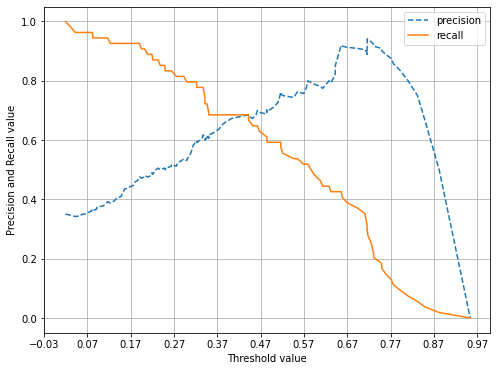

In [8]:
# 정밀도 재현율 곡선을 보고 임계값별 정밀도와 재현율 값의 변화 확인

pred_proba_c1 = lr_clf.predict_proba(x_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 재현율 곡선을 보면 임계값을 0.42정도로 하면 정밀도와 재현율이 균형을 맞추게 됨
- 하지만 이렇게 하면 두 지표 모두 0.7이 안되는 수치로 두 지표의 값이 모두 낮음

In [9]:
# 원본 데이터의 피처 값의 분포 확인

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- min값이 0인 칼럼이 많음
- Pregnancies카럼은 출산 횟수를 의미하므로 0값 가능
- Glucose 칼럼은 포도당 수치인데 이게 0인 것은 말이 되지 않음

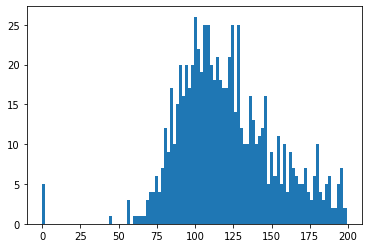

In [10]:
# Glucose 칼럼 시각화

plt.hist(data['Glucose'], bins = 100)
plt.show()

- 0값이 5개 정도 존재

In [12]:
# min값이 0으로 돼 있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인

# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = data[data[feature] == 0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100 * zero_count / total_count))

Glucose 0건수는 5, 퍼센트는 0.65%
BloodPressure 0건수는 35, 퍼센트는 4.56%
SkinThickness 0건수는 227, 퍼센트는 29.56%
Insulin 0건수는 374, 퍼센트는 48.70%
BMI 0건수는 11, 퍼센트는 1.43%


- SkinThickness와 Insulin의 0값은 29.56%, 48.7%로 많음. 따라서 일괄삭제할 경우 학습을 수행하기 어려움
- 그러므로 위 피처의 0값을 평균값으로 대체

In [13]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체

mean_zero_features = data[zero_features].mean()
data[zero_features] = data[zero_features].replace(0, mean_zero_features)

In [14]:
# 데이터 세트에 피처 스케일링 적용
# 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋음

X = data.iloc[:, : -1]
y = data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


- 데이터 변환과 스케일링을 통해 성능 수치가 일정수준 개선됨
- 하지만 여전히 재현율 수치는 개선 필요
- 분류 결정 임계값을 변화시키면서 재현율 성능 수치 개선 확인

In [19]:
# 임계값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화 출력

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값:  0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC: 0.8433
임계값:  0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC: 0.8433
임계값:  0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC: 0.8433
임계값:  0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC: 0.8433
임계값:  0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC: 0.8433
임계값:  0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC: 0.8433
임계값:  0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
임계값:  0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


- 정확도와 정밀도를 희생하고 재현율을 높이는데 가장 좋은 임계값은 0.3으로 재현율 = 0.7963
- 하지만 정밀도가 0.5658로 매우 저조하므로 안좋은 선택
- 임계값 0.48이 전체적인 성능 평가 지표를 ㅠ지하면서 재현율을 약간 향상시키는 좋은 임계값으로 보임
- 이 경우 정확도 = 0.7987, 정밀도 = 0.7447, 재현율 = 0.6481, F1스코어 = 0.6931, ROC AUC = 0.8433

In [20]:
# 임계값을 0.48로 낮춰서 다시 로지스틱 회귀 모델로 예측 진행

# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
